In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
air_quality = pd.read_csv("./Airqualitylong.csv")

In [4]:
air_quality

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³
...,...,...,...,...,...,...,...
5267,London,GB,2019-04-09 06:00:00+00:00,London Westminster,no2,41.0,µg/m³
5268,London,GB,2019-04-09 05:00:00+00:00,London Westminster,no2,41.0,µg/m³
5269,London,GB,2019-04-09 04:00:00+00:00,London Westminster,no2,41.0,µg/m³
5270,London,GB,2019-04-09 03:00:00+00:00,London Westminster,no2,67.0,µg/m³


In [5]:
air_quality.city.unique()

array(['Antwerpen', 'London', 'Paris'], dtype=object)

In [6]:
air_quality.country.unique()

array(['BE', 'GB', 'FR'], dtype=object)

In [7]:
air_quality.location.unique()

array(['BETR801', 'London Westminster', 'FR04014'], dtype=object)

In [8]:
air_quality.parameter.unique()

array(['pm25', 'no2'], dtype=object)

### using pandas datetime properties

In [10]:
air_quality["date.utc"] = pd.to_datetime(air_quality["date.utc"])

In [11]:
air_quality["date.utc"]

0      2019-06-18 06:00:00+00:00
1      2019-06-17 08:00:00+00:00
2      2019-06-17 07:00:00+00:00
3      2019-06-17 06:00:00+00:00
4      2019-06-17 05:00:00+00:00
                  ...           
5267   2019-04-09 06:00:00+00:00
5268   2019-04-09 05:00:00+00:00
5269   2019-04-09 04:00:00+00:00
5270   2019-04-09 03:00:00+00:00
5271   2019-04-09 02:00:00+00:00
Name: date.utc, Length: 5272, dtype: datetime64[ns, UTC]

### what is the start and end date of the time series data set we are working with?

In [12]:
air_quality["date.utc"].min(), air_quality["date.utc"].max()

(Timestamp('2019-04-09 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [13]:
air_quality["date.utc"].max() - air_quality["date.utc"].min()

Timedelta('72 days 23:00:00')

### I want to add a new column to the DateFrame containing only the month of the measurement

In [14]:
air_quality["month"] = air_quality["date.utc"].dt.month

In [15]:
air_quality

,city,country,date.utc,location,parameter,value,unit,month
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³,6
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³,6
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³,6
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³,6
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³,6
...,...,...,...,...,...,...,...,...
5267,London,GB,2019-04-09 06:00:00+00:00,London Westminster,no2,41.0,µg/m³,4
5268,London,GB,2019-04-09 05:00:00+00:00,London Westminster,no2,41.0,µg/m³,4
5269,London,GB,2019-04-09 04:00:00+00:00,London Westminster,no2,41.0,µg/m³,4
5270,London,GB,2019-04-09 03:00:00+00:00,London Westminster,no2,67.0,µg/m³,4


### What is the average NO2 concentration for each day of the week for each of the measurement locations

In [17]:
air_quality.groupby([air_quality["date.utc"].dt.weekday, "location"])["value"].mean()

date.utc  location          
0         BETR801               25.065657
          FR04014               29.495417
          London Westminster    21.173077
1         BETR801               32.423077
          FR04014               34.402381
          London Westminster    26.102510
2         BETR801               18.812500
          FR04014               30.130579
          London Westminster    22.427039
3         BETR801               18.892857
          FR04014               28.749378
          London Westminster    21.354906
4         BETR801               18.180000
          FR04014               32.980851
          London Westminster    20.756930
5         BETR801               24.500000
          FR04014               24.955752
          London Westminster    19.367580
6         BETR801               27.297101
          FR04014               24.467917
          London Westminster    18.980349
Name: value, dtype: float64

### plot the typical NO2 pattern during the day of our time series of all stations together.in other words, what is the average value for each hour of the day?

<Axes: xlabel='date.utc'>

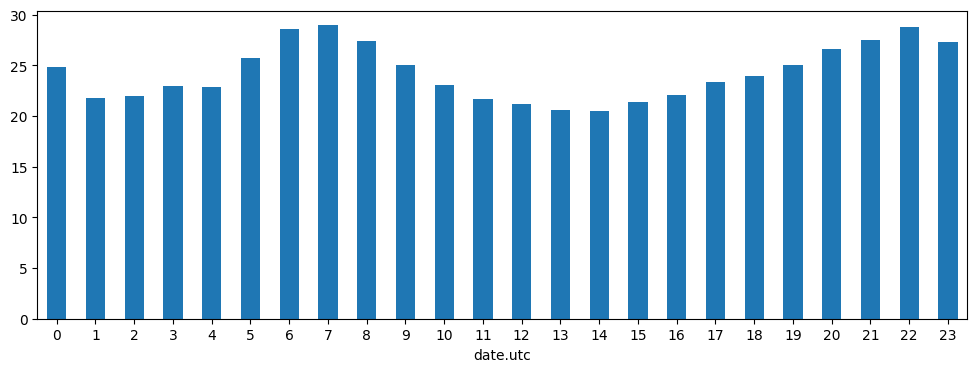

In [19]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.groupby(air_quality["date.utc"].dt.hour)["value"].mean().plot(kind="bar", rot=0, ax=axs)

### Datetime as index